<a href="https://colab.research.google.com/github/mahathirarf/Data-Analysis/blob/main/Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,ADM_RNO1,Province,Health_region_ grouped,Gender,Marital_status,Household,Age,Worked_job_business,Edu_level,Gen_health_state,...,Physical_vigorous_act_time,Work_hours,working_status,Aboriginal_identity,Birth_country,Immigrant,Insurance_cover,Food_security,Income_source,Total_income
0,1000,47,47906,2,1,2,3,1,3,3,...,10.0,38.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,5.0
1,100005,47,47906,1,1,2,5,6,2,3,...,0.0,96.0,6.0,2.0,1.0,2.0,1.0,0.0,2.0,4.0
2,100012,59,59914,2,2,1,5,6,1,2,...,9996.0,96.0,6.0,2.0,1.0,2.0,6.0,6.0,2.0,2.0
3,100015,13,13904,1,2,1,5,6,1,3,...,9996.0,96.0,6.0,2.0,1.0,2.0,6.0,0.0,2.0,3.0
4,100018,46,46903,1,2,1,4,2,3,5,...,9996.0,96.0,6.0,2.0,1.0,2.0,2.0,0.0,2.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24250 entries, 0 to 24249
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ADM_RNO1                    24250 non-null  int64  
 1   Province                    24250 non-null  int64  
 2   Health_region_ grouped      24250 non-null  int64  
 3   Gender                      24250 non-null  int64  
 4   Marital_status              24250 non-null  int64  
 5   Household                   24250 non-null  int64  
 6   Age                         24250 non-null  int64  
 7   Worked_job_business         24250 non-null  int64  
 8   Edu_level                   24250 non-null  int64  
 9   Gen_health_state            24250 non-null  int64  
 10  Life_satisfaction           24250 non-null  int64  
 11  Mental_health_state         24250 non-null  int64  
 12  Stress_level                24250 non-null  int64  
 13  Work_stress                 242

In [ ]:
data = data.dropna()

In [ ]:
data.describe()

,ADM_RNO1,Province,Health_region_ grouped,Gender,Marital_status,Household,Age,Worked_job_business,Edu_level,Gen_health_state,...,Physical_vigorous_act_time,Work_hours,working_status,Aboriginal_identity,Birth_country,Immigrant,Insurance_cover,Food_security,Income_source,Total_income
count,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,...,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000
mean,182146.849447,34.340736,35265.527370,1.542644,1.752312,1.715571,3.830664,3.678748,3.000908,2.450627,...,8105.225933,75.771797,4.322408,2.168758,1.318651,1.978451,5.141430,0.992982,2.365340,3.866661
std,77409.107573,15.293428,15300.596273,0.498188,1.260679,0.676640,1.294981,2.453077,1.572059,1.070194,...,3907.970575,28.216415,2.375062,1.181713,1.154879,1.060113,1.853458,2.189066,2.508663,1.526430
min,21.000000,10.000000,10911.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,134128.250000,24.000000,24906.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000,...,9996.000000,44.000000,1.000000,2.000000,1.000000,2.000000,6.000000,0.000000,1.000000,3.000000
50%,188065.500000,35.000000,35949.000000,2.000000,1.000000,2.000000,4.000000,6.000000,3.000000,2.000000,...,9996.000000,96.000000,6.000000,2.000000,1.000000,2.000000,6.000000,0.000000,2.000000,4.000000
75%,244778.500000,47.000000,47906.000000,2.000000,2.000000,2.000000,5.000000,6.000000,3.000000,3.000000,...,9996.000000,96.000000,6.000000,2.000000,1.000000,2.000000,6.000000,0.000000,2.000000,5.000000
max,301244.000000,60.000000,60901.000000,2.000000,9.000000,9.000000,5.000000,9.000000,9.000000,8.000000,...,9999.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [ ]:
data.columns

Index(['ADM_RNO1', 'Province', 'Health_region_ grouped', 'Gender',
       'Marital_status', 'Household', 'Age', 'Worked_job_business',
       'Edu_level', 'Gen_health_state', 'Life_satisfaction',
       'Mental_health_state', 'Stress_level', 'Work_stress', 'Sense_belonging',
       'Weight_state', 'BMI_12_17', 'BMI_18_above', 'Sleep_apnea', 'High_BP',
       'High_cholestrol', 'Diabetic', 'Fatigue_syndrome', 'Mood_disorder',
       'Anxiety_disorder', 'Respiratory_chronic_con', 'Musculoskeletal_con',
       'Cardiovascular_con', 'Health_utility_indx', 'Pain_status',
       'Act_improve_health', 'Fruit_veg_con', 'Smoked', 'Tobaco_use',
       'weekly_alcohol', 'Cannabies_use', 'Drug_use', 'Total_active_time',
       'Total_physical_act_time', 'Other_physical_act_time',
       'Physical_vigorous_act_time', 'Work_hours ', 'working_status ',
       'Aboriginal_identity', 'Birth_country', 'Immigrant', 'Insurance_cover',
       'Food_security', 'Income_source', 'Total_income'],
      dtype='

In [ ]:
data.head()

,ADM_RNO1,Province,Health_region_ grouped,Gender,Marital_status,Household,Age,Worked_job_business,Edu_level,Gen_health_state,...,Physical_vigorous_act_time,Work_hours,working_status,Aboriginal_identity,Birth_country,Immigrant,Insurance_cover,Food_security,Income_source,Total_income
0,1000,47,47906,2,1,2,3,1,3,3,...,10.0,38.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,5.0
1,100005,47,47906,1,1,2,5,6,2,3,...,0.0,96.0,6.0,2.0,1.0,2.0,1.0,0.0,2.0,4.0
2,100012,59,59914,2,2,1,5,6,1,2,...,9996.0,96.0,6.0,2.0,1.0,2.0,6.0,6.0,2.0,2.0
3,100015,13,13904,1,2,1,5,6,1,3,...,9996.0,96.0,6.0,2.0,1.0,2.0,6.0,0.0,2.0,3.0
4,100018,46,46903,1,2,1,4,2,3,5,...,9996.0,96.0,6.0,2.0,1.0,2.0,2.0,0.0,2.0,1.0


In [ ]:
data.columns

Index(['ADM_RNO1', 'Province', 'Health_region_ grouped', 'Gender',
       'Marital_status', 'Household', 'Age', 'Worked_job_business',
       'Edu_level', 'Gen_health_state', 'Life_satisfaction',
       'Mental_health_state', 'Stress_level', 'Work_stress', 'Sense_belonging',
       'Weight_state', 'BMI_12_17', 'BMI_18_above', 'Sleep_apnea', 'High_BP',
       'High_cholestrol', 'Diabetic', 'Fatigue_syndrome', 'Mood_disorder',
       'Anxiety_disorder', 'Respiratory_chronic_con', 'Musculoskeletal_con',
       'Cardiovascular_con', 'Health_utility_indx', 'Pain_status',
       'Act_improve_health', 'Fruit_veg_con', 'Smoked', 'Tobaco_use',
       'weekly_alcohol', 'Cannabies_use', 'Drug_use', 'Total_active_time',
       'Total_physical_act_time', 'Other_physical_act_time',
       'Physical_vigorous_act_time', 'Work_hours ', 'working_status ',
       'Aboriginal_identity', 'Birth_country', 'Immigrant', 'Insurance_cover',
       'Food_security', 'Income_source', 'Total_income'],
      dtype='

In [ ]:
numerical = data.drop(categorical, axis = 1)

<Axes: >

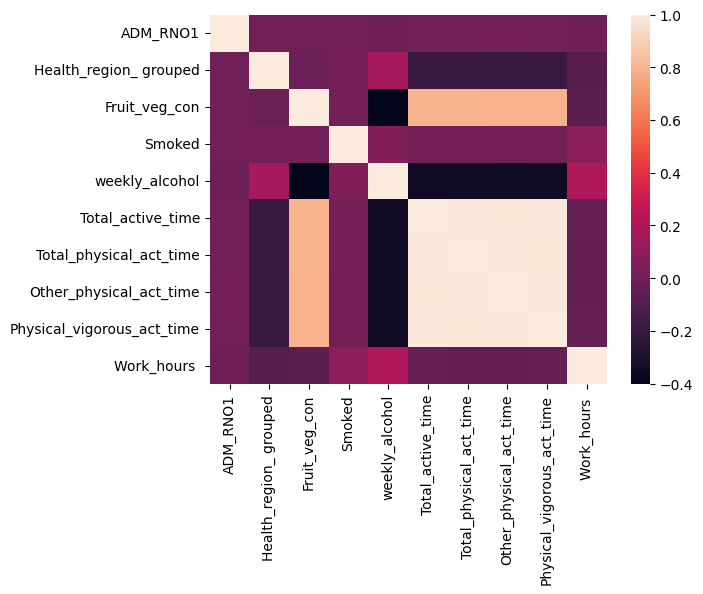

In [ ]:
corr = numerical.corr()
sns.heatmap(corr)

In [ ]:
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical)
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical.columns)

pca = PCA(n_components=5)  # Keep all components initially
pca_transformed = pca.fit_transform(scaled_numerical)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

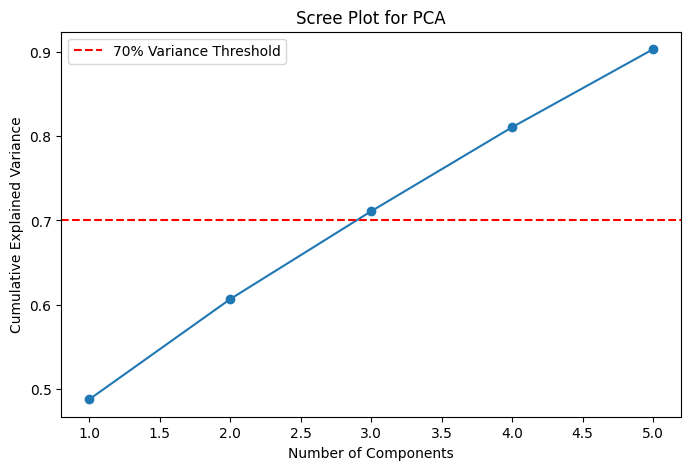

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker="o", linestyle="-")
plt.axhline(y=0.7, color="r", linestyle="--", label="70% Variance Threshold")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot for PCA")
plt.legend()
plt.show()

In [ ]:
sum(explained_variance[3:6])

np.float64(0.26053868954336856)

In [ ]:
numerical_pca = pd.DataFrame(pca_transformed, columns = ['MCA1', 'MCA2', 'MCA3', 'MCA4', 'MCA5'])
numerical_pca.head()

,MCA1,MCA2,MCA3,MCA4,MCA5
0,-4.581817,-1.070620,0.255861,-2.362932,0.919112
1,-4.654828,0.433360,0.092929,-1.063716,0.190601
2,0.751955,0.874397,1.518202,-1.381291,-0.687713
3,1.049710,1.322279,-1.051629,-0.887217,0.017332
4,0.836157,1.001051,0.791500,-1.241508,-0.488339


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to match features with PCs
    index=numerical.columns,  # Original variable names
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

print("PCA Loadings (Correlations between Variables & Components):")
print(loadings)

PCA Loadings (Correlations between Variables & Components):
                                 PC1       PC2       PC3       PC4       PC5
ADM_RNO1                    0.004211 -0.006946  0.173858  0.983363 -0.051847
Health_region_ grouped     -0.099016 -0.148940  0.854580 -0.164288 -0.234458
Fruit_veg_con               0.389800 -0.043951  0.173740 -0.037459 -0.032090
Smoked                      0.003162  0.481436  0.326108 -0.011332  0.811540
weekly_alcohol             -0.206141  0.430111  0.251580 -0.060663 -0.404978
Total_active_time           0.445912  0.064454  0.034628 -0.010881 -0.059342
Total_physical_act_time     0.446055  0.063740  0.033941 -0.009787 -0.058652
Other_physical_act_time     0.445376  0.062461  0.033629 -0.009087 -0.062696
Physical_vigorous_act_time  0.445418  0.066822  0.033744 -0.009706 -0.060687
Work_hours                 -0.034215  0.736530 -0.187139  0.020099 -0.322695


<Axes: >

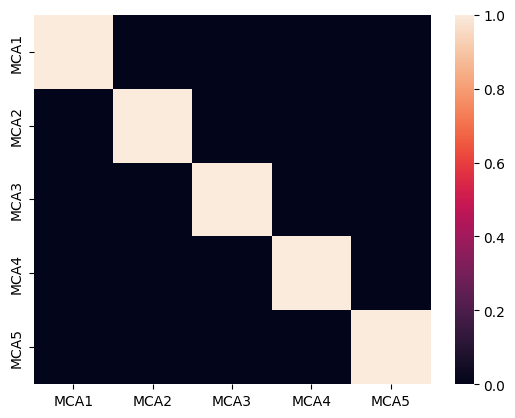

In [ ]:
sns.heatmap(numerical_pca.corr())

In [ ]:
categorical = []

for i in data.columns:
  if data[i].nunique() < 20:
    categorical.append(i)

In [ ]:
len(categorical)

40

In [ ]:
len(data.columns)

50

In [ ]:
categorical = data[categorical]

In [ ]:
categorical.columns

Index(['Province', 'Gender', 'Marital_status', 'Household', 'Age',
       'Worked_job_business', 'Edu_level', 'Gen_health_state',
       'Life_satisfaction', 'Mental_health_state', 'Stress_level',
       'Work_stress', 'Sense_belonging', 'Weight_state', 'BMI_12_17',
       'BMI_18_above', 'Sleep_apnea', 'High_BP', 'High_cholestrol', 'Diabetic',
       'Fatigue_syndrome', 'Mood_disorder', 'Anxiety_disorder',
       'Respiratory_chronic_con', 'Musculoskeletal_con', 'Cardiovascular_con',
       'Health_utility_indx', 'Pain_status', 'Act_improve_health',
       'Tobaco_use', 'Cannabies_use', 'Drug_use', 'working_status ',
       'Aboriginal_identity', 'Birth_country', 'Immigrant', 'Insurance_cover',
       'Food_security', 'Income_source', 'Total_income'],
      dtype='object')

In [ ]:
for i in categorical.columns:
  if categorical[i].nunique() > 5:
    print(i)
    print(categorical[i].nunique())

Province
11
Worked_job_business
6
Gen_health_state
7
Life_satisfaction
14
Mental_health_state
8
Stress_level
7
Work_stress
9
Sense_belonging
7
Weight_state
7
Act_improve_health
6
Insurance_cover
6
Food_security
6
Total_income
6


In [ ]:
categorical['Life_satisfaction'].value_counts()

,count
Life_satisfaction,
8,7198
10,5162
9,4432
7,3369
5,1205
6,1201
99,788
4,276
3,161


In [ ]:
pairs = list(combinations(categorical.columns, 2))
pairs

[('Province', 'Gender'),
 ('Province', 'Marital_status'),
 ('Province', 'Household'),
 ('Province', 'Age'),
 ('Province', 'Worked_job_business'),
 ('Province', 'Edu_level'),
 ('Province', 'Gen_health_state'),
 ('Province', 'Life_satisfaction'),
 ('Province', 'Mental_health_state'),
 ('Province', 'Stress_level'),
 ('Province', 'Work_stress'),
 ('Province', 'Sense_belonging'),
 ('Province', 'Weight_state'),
 ('Province', 'BMI_12_17'),
 ('Province', 'BMI_18_above'),
 ('Province', 'Sleep_apnea'),
 ('Province', 'High_BP'),
 ('Province', 'High_cholestrol'),
 ('Province', 'Diabetic'),
 ('Province', 'Fatigue_syndrome'),
 ('Province', 'Mood_disorder'),
 ('Province', 'Anxiety_disorder'),
 ('Province', 'Respiratory_chronic_con'),
 ('Province', 'Musculoskeletal_con'),
 ('Province', 'Cardiovascular_con'),
 ('Province', 'Health_utility_indx'),
 ('Province', 'Pain_status'),
 ('Province', 'Act_improve_health'),
 ('Province', 'Tobaco_use'),
 ('Province', 'Cannabies_use'),
 ('Province', 'Drug_use'),
 ('

In [ ]:
dependent = []

for pair in pairs:
    crosstab = pd.crosstab(data[pair[0]], data[pair[1]])  # Create contingency table
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab)

    if p_value < 0.05:  # Check for significance
        print(pair[0], pair[1])
        print(f'P-value: {p_value}\n')
        dependent.append(pair)

Province Gender
P-value: 0.00022782591797893017

Province Marital_status
P-value: 1.2941736291977547e-37

Province Household
P-value: 5.493545276655272e-12

Province Age
P-value: 0.0

Province Worked_job_business
P-value: 0.0

Province Edu_level
P-value: 5.0397748090848996e-73

Province Gen_health_state
P-value: 3.795543702860189e-53

Province Life_satisfaction
P-value: 4.818582915189106e-27

Province Mental_health_state
P-value: 4.2548592518995535e-45

Province Stress_level
P-value: 2.060093988721571e-51

Province Work_stress
P-value: 1.2391039187378132e-239

Province Sense_belonging
P-value: 3.6035330670893407e-96

Province Weight_state
P-value: 1.7635817795439565e-86

Province BMI_12_17
P-value: 8.143853138886524e-33

Province BMI_18_above
P-value: 3.5414507275797984e-86

Province Sleep_apnea
P-value: 7.8320857585259e-06

Province High_BP
P-value: 1.142377186031331e-85

Province High_cholestrol
P-value: 2.4701717635769739e-88

Province Diabetic
P-value: 3.09938270961117e-36

Provinc

In [ ]:
len(dependent)

767

In [ ]:
encoder = OneHotEncoder(sparse_output = False)
encoded_data = encoder.fit_transform(categorical)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical.columns))
encoded_df

,Province_10,Province_11,Province_12,Province_13,Province_24,Province_35,Province_46,Province_47,Province_48,Province_59,...,Food_security_9.0,Income_source_1.0,Income_source_2.0,Income_source_9.0,Total_income_1.0,Total_income_2.0,Total_income_3.0,Total_income_4.0,Total_income_5.0,Total_income_9.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24220,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24221,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mca = TruncatedSVD(n_components=30, random_state=42)
mca_components = mca.fit_transform(encoded_df)

# Convert to DataFrame for readability
mca_df = pd.DataFrame(mca_components)
print(mca_df)

             0         1         2         3         4         5         6   \
0      4.878879 -1.333589  0.620715  1.244357 -0.765474  0.534394 -0.875163   
1      4.412790  1.349272  0.418045  1.390129 -0.480570  0.674643  0.594816   
2      4.335930  2.123449  1.290717 -0.872626 -0.691515  1.755984  0.090744   
3      5.075152  1.837213  0.981284 -0.312545  0.232804 -0.339957  0.883253   
4      3.826356  1.530544  1.609598  0.041285 -0.540555  0.215417 -0.377228   
...         ...       ...       ...       ...       ...       ...       ...   
24219  5.392536  0.185735 -1.390094 -0.554335  1.428578  0.790764  0.520962   
24220  4.794981 -0.803088  1.781289 -0.472918 -0.212569 -0.654673 -0.536642   
24221  4.872767  1.124261 -0.152197 -2.022436  0.993406  0.220903  0.839960   
24222  3.377529  1.537478  1.921424 -0.367231  0.176002 -0.780843 -1.165039   
24223  3.929302  2.302489  1.358523 -0.166233  0.073442 -0.595625 -0.617277   

             7         8         9   ...        20 

In [ ]:
explained_variance = mca.explained_variance_ratio_
cumulative_variance =explained_variance.cumsum()

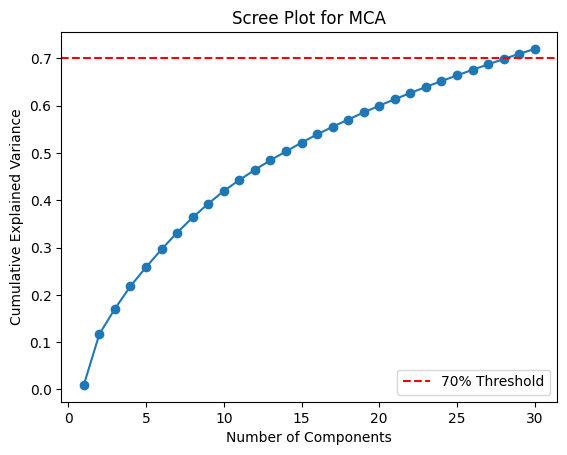

In [ ]:
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker="o", linestyle="-")
plt.axhline(y=0.7, color="r", linestyle="--", label="70% Threshold")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot for MCA")
plt.legend()
plt.show()

Feature Contributions to Total Variance:


<Axes: >

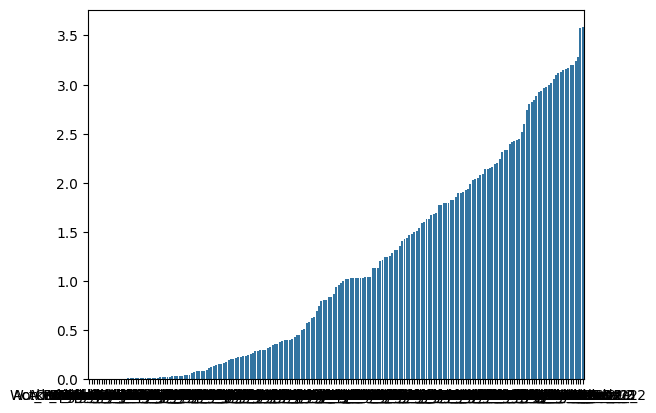

In [ ]:
category_contributions = np.sum(np.abs(mca.components_), axis=0)
sorted_contributions = pd.Series(category_contributions, index=encoder.get_feature_names_out()).sort_values(ascending=True)
print("Feature Contributions to Total Variance:")
sns.barplot(sorted_contributions)